# Introduction

Our goal is to look at transcripts of inaugural addresses made by American presidents and note their similarities and differences.

## Gathering the Data

The transcriptions are easily available on the internet. We looked at the White House archive and some News websites. To narrow down our dataset, we considered just the last five speeches. 

In [1]:
# We create a disctionary with all the speeches

speeches = ['Trump_2017', 'Obama_2013', 'Obama_2009', 'Bush_2005', 'Bush_2001']
data = {}

for s in speeches:
    with open('./Inaugural addresses/' + s + '.txt', 'r', encoding = 'utf-8') as f:
        data[s] = f.read()

In [2]:
# Let's take a look at our data to see if everything is fine.

data['Obama_2013'][:1000]

'Vice President Biden, Mr. Chief Justice,\nmembers of the United States Congress, distinguished guests, and fellow citizens:  \n \nEach time we gather to inaugurate a President we bear witness to the enduring strength of our Constitution.  We affirm the promise of our democracy.  We recall that what binds this nation together is not the colors of our skin or the tenets of our faith or the origins of our names.  What makes us exceptional -- what makes us American -- is our allegiance to an idea articulated in a declaration made more than two centuries ago:\n“We hold these truths to be self-evident, that all men are created equal; that they are endowed by their Creator with certain unalienable rights; that among these are life, liberty, and the pursuit of happiness.”  \n \nToday we continue a never-ending journey to bridge the meaning of those words with the realities of our time.  For history tells us that while these truths may be self-evident, they’ve never been self-executing; that w

In [3]:
# Let's put our data into a pandas dataframe

import pandas as pd

pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df.columns = ['speech']
data_df = data_df.sort_index()

data_df

speech
Bush_2001   Chief Justice Rehnquist, President Carter, President Bush...\n\n(APPLAUSE)\n\n... President Clinton, distinguished guests and my fellow citizens, ...
Bush_2005    Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, members of the United States Congress, reverend, c...
Obama_2009  My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne...
Obama_2013  Vice President Biden, Mr. Chief Justice,\nmembers of the United States Congress, distinguished guests, and fellow citizens:  \n \nEach time we gat...
Trump_2017  Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world, thank you....

Our data are in a  **corpus** format. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

## Cleaning the Data

We appaly some common data cleaning techniques, which for text data are also known as text pre-processing techniques.

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)

In [4]:
# Apply some text cleaning techniques

import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\(.*?\)', '', text) # remove comments in brakets like:'(Applause)'
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove the punctuation
    text = re.sub('[‘’“”…]', '', text) # remove some more punctuation
    text = re.sub('\w*\d\w*', '', text) # remove the number and the words containing numbers
    text = re.sub('\n', ' ', text) # remove new-line command
    return text

clean = lambda x: clean_text(x)

In [5]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.speech.apply(clean))
data_clean

speech
Bush_2001   chief justice rehnquist president carter president bush     president clinton distinguished guests and my fellow citizens the peaceful transfer of...
Bush_2005    vice president cheney mr chief justice president carter president bush president clinton members of the united states congress reverend clergy di...
Obama_2009  my fellow citizens  i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by o...
Obama_2013  vice president biden mr chief justice members of the united states congress distinguished guests and fellow citizens     each time we gather to in...
Trump_2017  chief justice roberts president carter president clinton president bush president obama fellow americans and people of the world thank you we the ...

## Organizing the Data

Now that we have cleaned our text, we can tokenized it. This means that it will be broken down into smaller pieces.
In our case we will use scikit-learn's CountVectorizer to create a **Document-Term Matrix** where every row will represent a different document and every column will represent a different word.

**Note:** CountVectorizer also allows us to remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc. 

In [6]:
# Let's create a document-term matrix using CountVectorizer, and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.speech)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index

data_dtm

abandon  abandoned  abandonment  ability  abraham  abroad  \
Bush_2001         0          0            1        0        0       0   
Bush_2005         2          0            0        0        1       0   
Obama_2009        0          1            0        1        0       0   
Obama_2013        0          0            0        0        0       1   
Trump_2017        0          0            0        0        0       0   

            absolutism  abuse  accept  accepted  ...  wrong  wrote  year  \
Bush_2001            0      1       1         0  ...      1      1     0   
Bush_2005            0      0       2         2  ...      1      0     0   
Obama_2009           0      0       1         0  ...      1      0     2   
Obama_2013           1      0       0         0  ...      0      0     0   
Trump_2017           0      0       1         0  ...      0      0     0   

            years  yes  yesterday  yielding  young  youngest  youth  
Bush_2001       2    0          0         1      1         0      0  
Bush_2005       3    0          1         0      1         1      0  
Obama_2009      1    1          0         0      1         0      0  
Obama_2013      5    0          0         0      1         0      1  
Trump_2017      2    1          0         0      1         0      0  

[5 rows x 1852 columns]

# Data Analysis

Now that our data are clean and organized in a standard format we can perform some data analysis. 
The kind of analysis we will perform in this notebook is the same kind of exploratory analysis one performs before applying some more advanced Machine Learning techniques.

For each of the speeches we are going to look for the following features:

1. **Most common words** - most common words used during the speech once the obvious one are removed
2. **Size of vocabulary** - number of unique words used during the speech

In [7]:
# Let's transpose our matrix. It is easier to work with columns than with rows.

data = data_dtm.transpose()
data.head()

Bush_2001  Bush_2005  Obama_2009  Obama_2013  Trump_2017
abandon              0          2           0           0           0
abandoned            0          0           1           0           0
abandonment          1          0           0           0           0
ability              0          0           1           0           0
abraham              0          1           0           0           0

In [8]:
# Let's find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

#top_dict

In [9]:
# Print the top 10 words said by in each speech
for speech, top_words in top_dict.items():
    print(speech)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('---')

Bush_2001
citizens, story, country, america, nation, americans, president, nations, courage, promise
---
Bush_2005
freedom, liberty, america, nation, americans, country, americas, world, free, history
---
Obama_2009
nation, new, people, today, let, america, work, common, time, spirit
---
Obama_2013
people, time, make, country, new, america, american, freedom, journey, equal
---
Trump_2017
america, american, people, country, nation, world, make, great, new, right
---


As one might expect, words like **America** or **nation** appear frequently in all speeches. Considering the speeches we’re analyzing, those words are not really intresting for us. 

$\rightarrow$ Let's us add them to our Stop-Words list. 

In [10]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each speech
words = []
for speech in data.columns:
    top = [word for (word, count) in top_dict[speech]]
    for t in top:
        words.append(t)
        
#words

# Let's aggregate this list and identify the most common words along with how many speeches they occur in
Counter(words).most_common()

# If more than three of the speeches have it as a top word, exclude it from the list
add_stop_words1 = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words1

['america',
 'nation',
 'citizens',
 'country',
 'americans',
 'new',
 'time',
 'people']

In [11]:
# Let's us update our Stop-words list

from sklearn.feature_extraction import text

add_stop_words2 = ['american', 'americas', 'president'] # some more stop_words we would like to get rid of
add_stop_words = add_stop_words1 + add_stop_words2
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix with the new set of stop-words
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.speech)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [12]:
# Let's create some WordClouds

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=10)

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 12]

# Create subplots for each speech
for index, speech in enumerate(data.columns):
    wc.generate(data_clean.speech[speech])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.keys()[index])
    
plt.show()

## Findings

* The WordClouds seem quite different from each other.
* George W. Bush is mostly focused on **hystory**, **freedom**, **justice**.
* Barack Obama is interested in the new generation. We see the word **generation** in both his speeches. The word **new** is one of our stop-words, but is very likely that this two words are linked together in his speeches.
* Donald Trump uses a lot the words **make** and **great** (this is probably due to his slogan). Also **dream** is probably part of the bi-gram **American dream**.

Let 's now find the size of the vocabulary relative to each speech

In [14]:
# Find the number of unique words used in each speech

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for speech in data.columns:
    uniques = data[speech].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.keys(), unique_list)), columns=['speech', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

speech  unique_words
4  Trump_2017           421
0   Bush_2001           459
1   Bush_2005           598
3  Obama_2013           643
2  Obama_2009           749

In [15]:
# Calculate the words per minute for each speech

# Find the total number of words used in each speech
total_list = []
for speech in data.columns:
    totals = sum(data[speech])
    total_list.append(totals)
    
# Speeches run times from Youtube (minutes)
run_times = [15, 21, 19, 19, 17]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

speech  unique_words  total_words  run_times  words_per_minute
4  Trump_2017           421          628         17         36.941176
1   Bush_2005           598          937         21         44.619048
0   Bush_2001           459          690         15         46.000000
3  Obama_2013           643          913         19         48.052632
2  Obama_2009           749         1025         19         53.947368

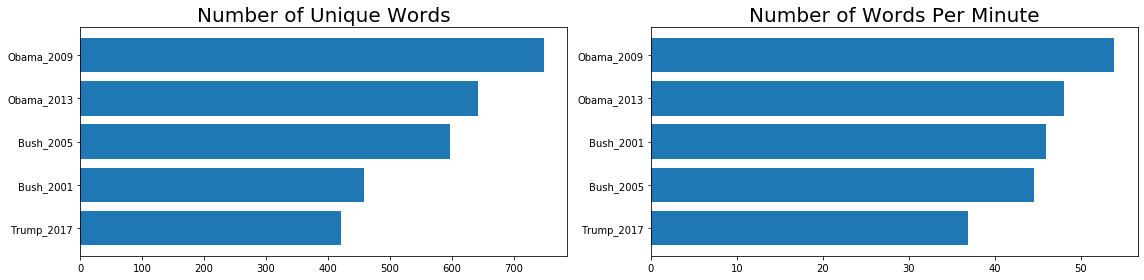

In [16]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.rcParams['figure.figsize'] = [16, 4]

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.speech)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.speech)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

## Findings

* Barack Obama seems to be the fastest speaker and also the one exhibiting the widest lexicon.